# AA1 Machine learning competition

We'll first install all the necessary libraries

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sklearn

In [126]:
from pandas import read_csv
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.neighbors import LocalOutlierFactor
from sklearn.linear_model import LinearRegression

In [137]:
data = read_csv("liver-patient-classification/train_features_ILDS.csv", delimiter = ',')
data.columns = ["Age", "Female", "TB", "DB", "Alkphos", "Sgpt", "Sgot", "TP", "ALB", "A/R"]
target = read_csv("liver-patient-classification/train_labels_ILDS.csv")
data["Target"] = target

numerical_columns = ["Age", "TB", "DB", "Alkphos", "Sgpt", "Sgot", "TP", "ALB", "A/R"]
categorical_columns = ["Female", "Target"]

data[categorical_columns] = data[categorical_columns].astype('category')

print(data[data["Target"]==1].count()[0]/462)

0.2857142857142857


/tmp/ipykernel_5578/1358611933.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(data[data["Target"]==1].count()[0]/462)


In [27]:
data.head()

Age Female   TB   DB  Alkphos  Sgpt  Sgot   TP  ALB   A/R Target
0   48      0  4.5  2.3      282    13    74  7.0  2.4  0.52      0
1   39      0  1.9  0.9      180    42    62  7.4  4.3  1.38      0
2   23      0  1.0  0.3      212    41    80  6.2  3.1  1.00      0
3   42      1  0.7  0.2      152    35    81  6.2  3.2  1.06      0
4   52      1  0.6  0.1      194    10    12  6.9  3.3  0.90      1

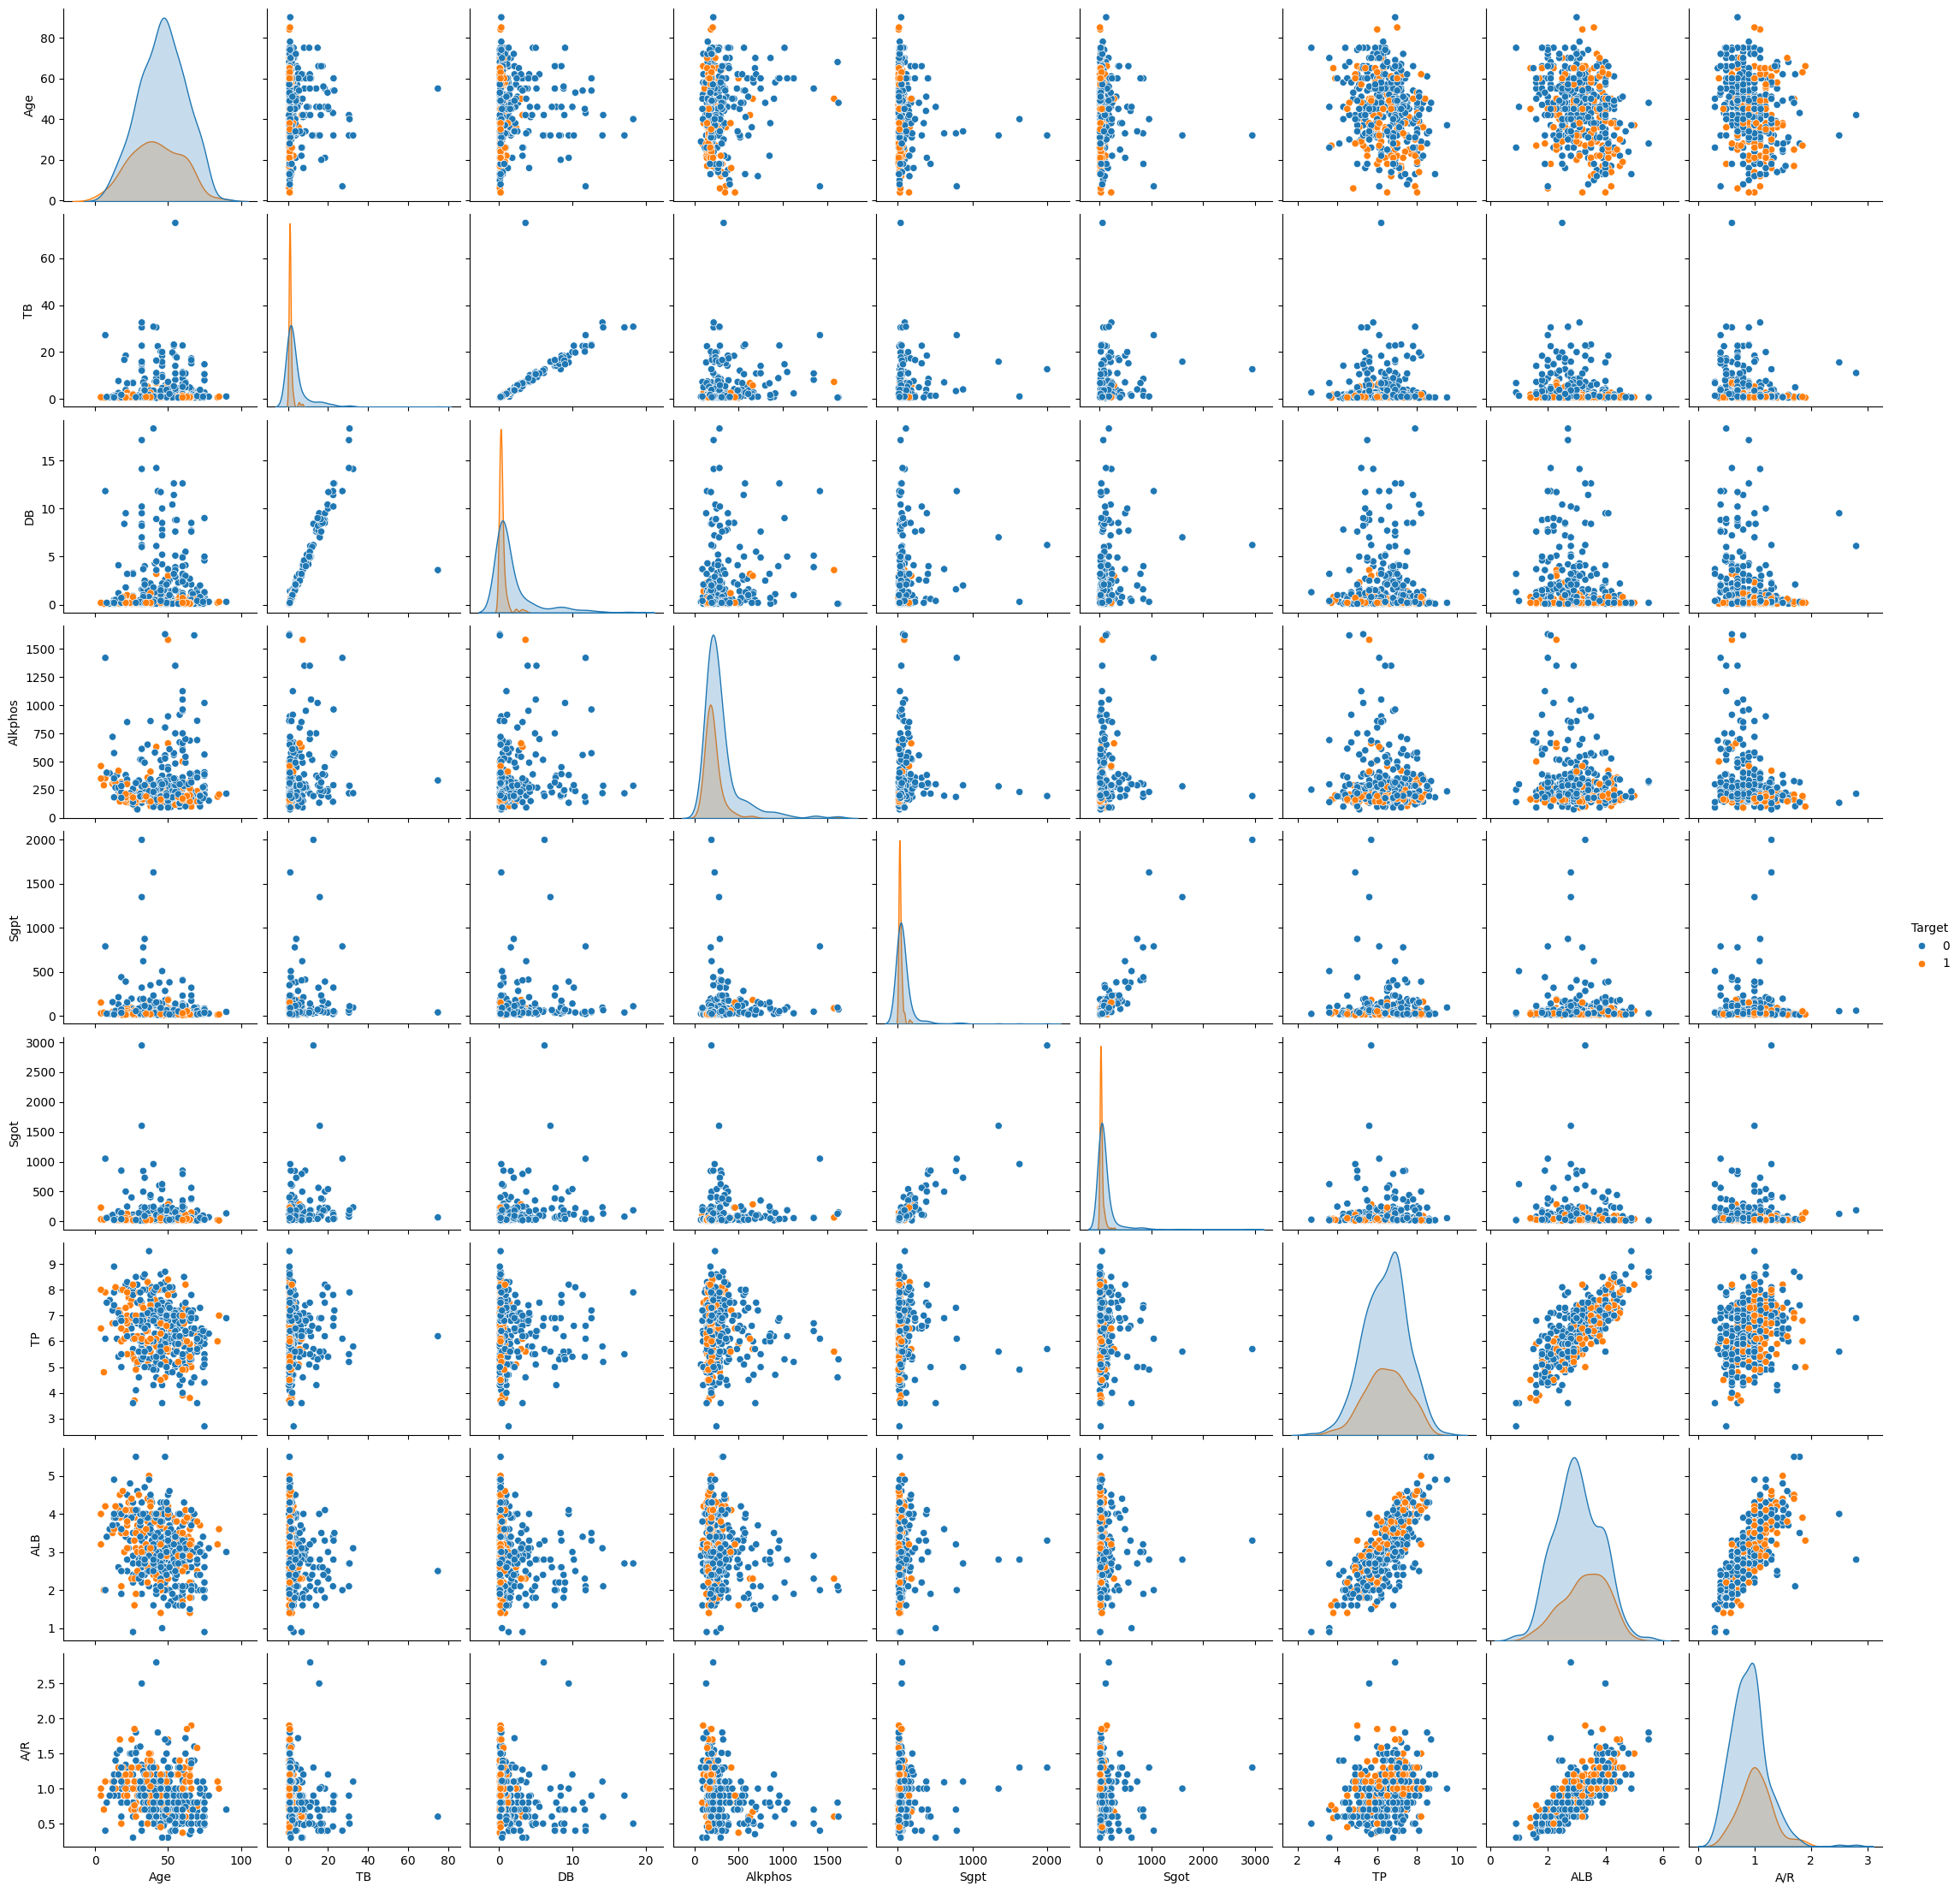

In [28]:
sns.pairplot(data=data, hue="Target")

In [33]:
data.describe()

Age          TB          DB      Alkphos         Sgpt  \
count  462.000000  462.000000  462.000000   462.000000   462.000000   
mean    44.891775    3.277489    1.445238   279.714286    73.952381   
std     16.324834    6.121320    2.678177   211.486918   164.499352   
min      4.000000    0.400000    0.100000    75.000000    10.000000   
25%     33.000000    0.800000    0.200000   176.000000    23.000000   
50%     45.000000    1.000000    0.300000   208.000000    34.000000   
75%     57.750000    2.675000    1.275000   290.000000    59.750000   
max     90.000000   75.000000   18.300000  1630.000000  2000.000000   

              Sgot          TP         ALB         A/R  
count   462.000000  462.000000  462.000000  462.000000  
mean     94.571429    6.421429    3.108442    0.942143  
std     202.026507    1.052708    0.793243    0.318291  
min      11.000000    2.700000    0.900000    0.300000  
25%      25.000000    5.700000    2.500000    0.700000  
50%      41.000000    6.500000    3.100000    0.910000  
75%      82.750000    7.100000    3.700000    1.100000  
max    2946.000000    9.500000    5.500000    2.800000

## Outlier Treatment

We'll use the LocalOutlierFactor model, which considers individuals with a low density of neighbours as outliers. To perform this analysis, we need to be careful with two things. The first is the scale of the variables, as this model depends on the wuclidean distance between samples. Therefore we created a RobustScaler model and modified the the numerical columns of the whole dataset. The other thing to bear in mind is to not reomve many positive cases. This is because being an outlier in the overall dataset may be correlated with a positive case. We consider our analysis to behave well with the unbalanced problem if the proportion of positives we remove is less than the initial proportion of positives.

In [142]:
OutlierScaler = RobustScaler()
ScaledOutlierX = OutlierScaler.fit_transform(data[numerical_columns])


local_outlier_factor = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
result = local_outlier_factor.fit_predict(ScaledOutlierX)

outliers = result==-1
no_outliers = result == 1
print(f'The model determined that there are {np.sum(outliers)} outliers')
print(f'The number of positive cases removed is {data[outliers & (data["Target"]==1)].count()[0]}')
print(data[outliers])

NO_data = data[no_outliers]

The model determined that there are 24 outliers
The number of positive cases removed is 2
     Age Female    TB    DB  Alkphos  Sgpt  Sgot   TP  ALB   A/R Target
21    33      0   7.1   3.7      196   622   497  6.9  3.6  1.09      0
71    58      0   0.4   0.1      100    59   126  4.3  2.5  1.40      0
85    44      1   1.9   0.6      298   378   602  6.6  3.3  1.00      0
89    60      0   8.6   4.0      298   412   850  7.4  3.0  0.60      0
123   21      0   3.9   1.8      150    36    27  6.8  3.9  1.34      0
137   60      0   6.8   3.2      308   404   794  6.8  3.0  0.70      0
155   33      0   3.4   1.6      186   779   844  7.3  3.2  0.70      0
161   75      0   2.8   1.3      250    23    29  2.7  0.9  0.50      0
171   48      0   0.7   0.2      326    29    17  8.7  5.5  1.70      0
174   50      0   7.3   3.6     1580    88    64  5.6  2.3  0.60      1
181   18      0   1.4   0.6      215   440   850  5.0  1.9  0.60      0
204   48      0   0.7   0.1     1630    74   1

/tmp/ipykernel_5578/136066189.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'The number of positive cases removed is {data[outliers & (data["Target"]==1)].count()[0]}')


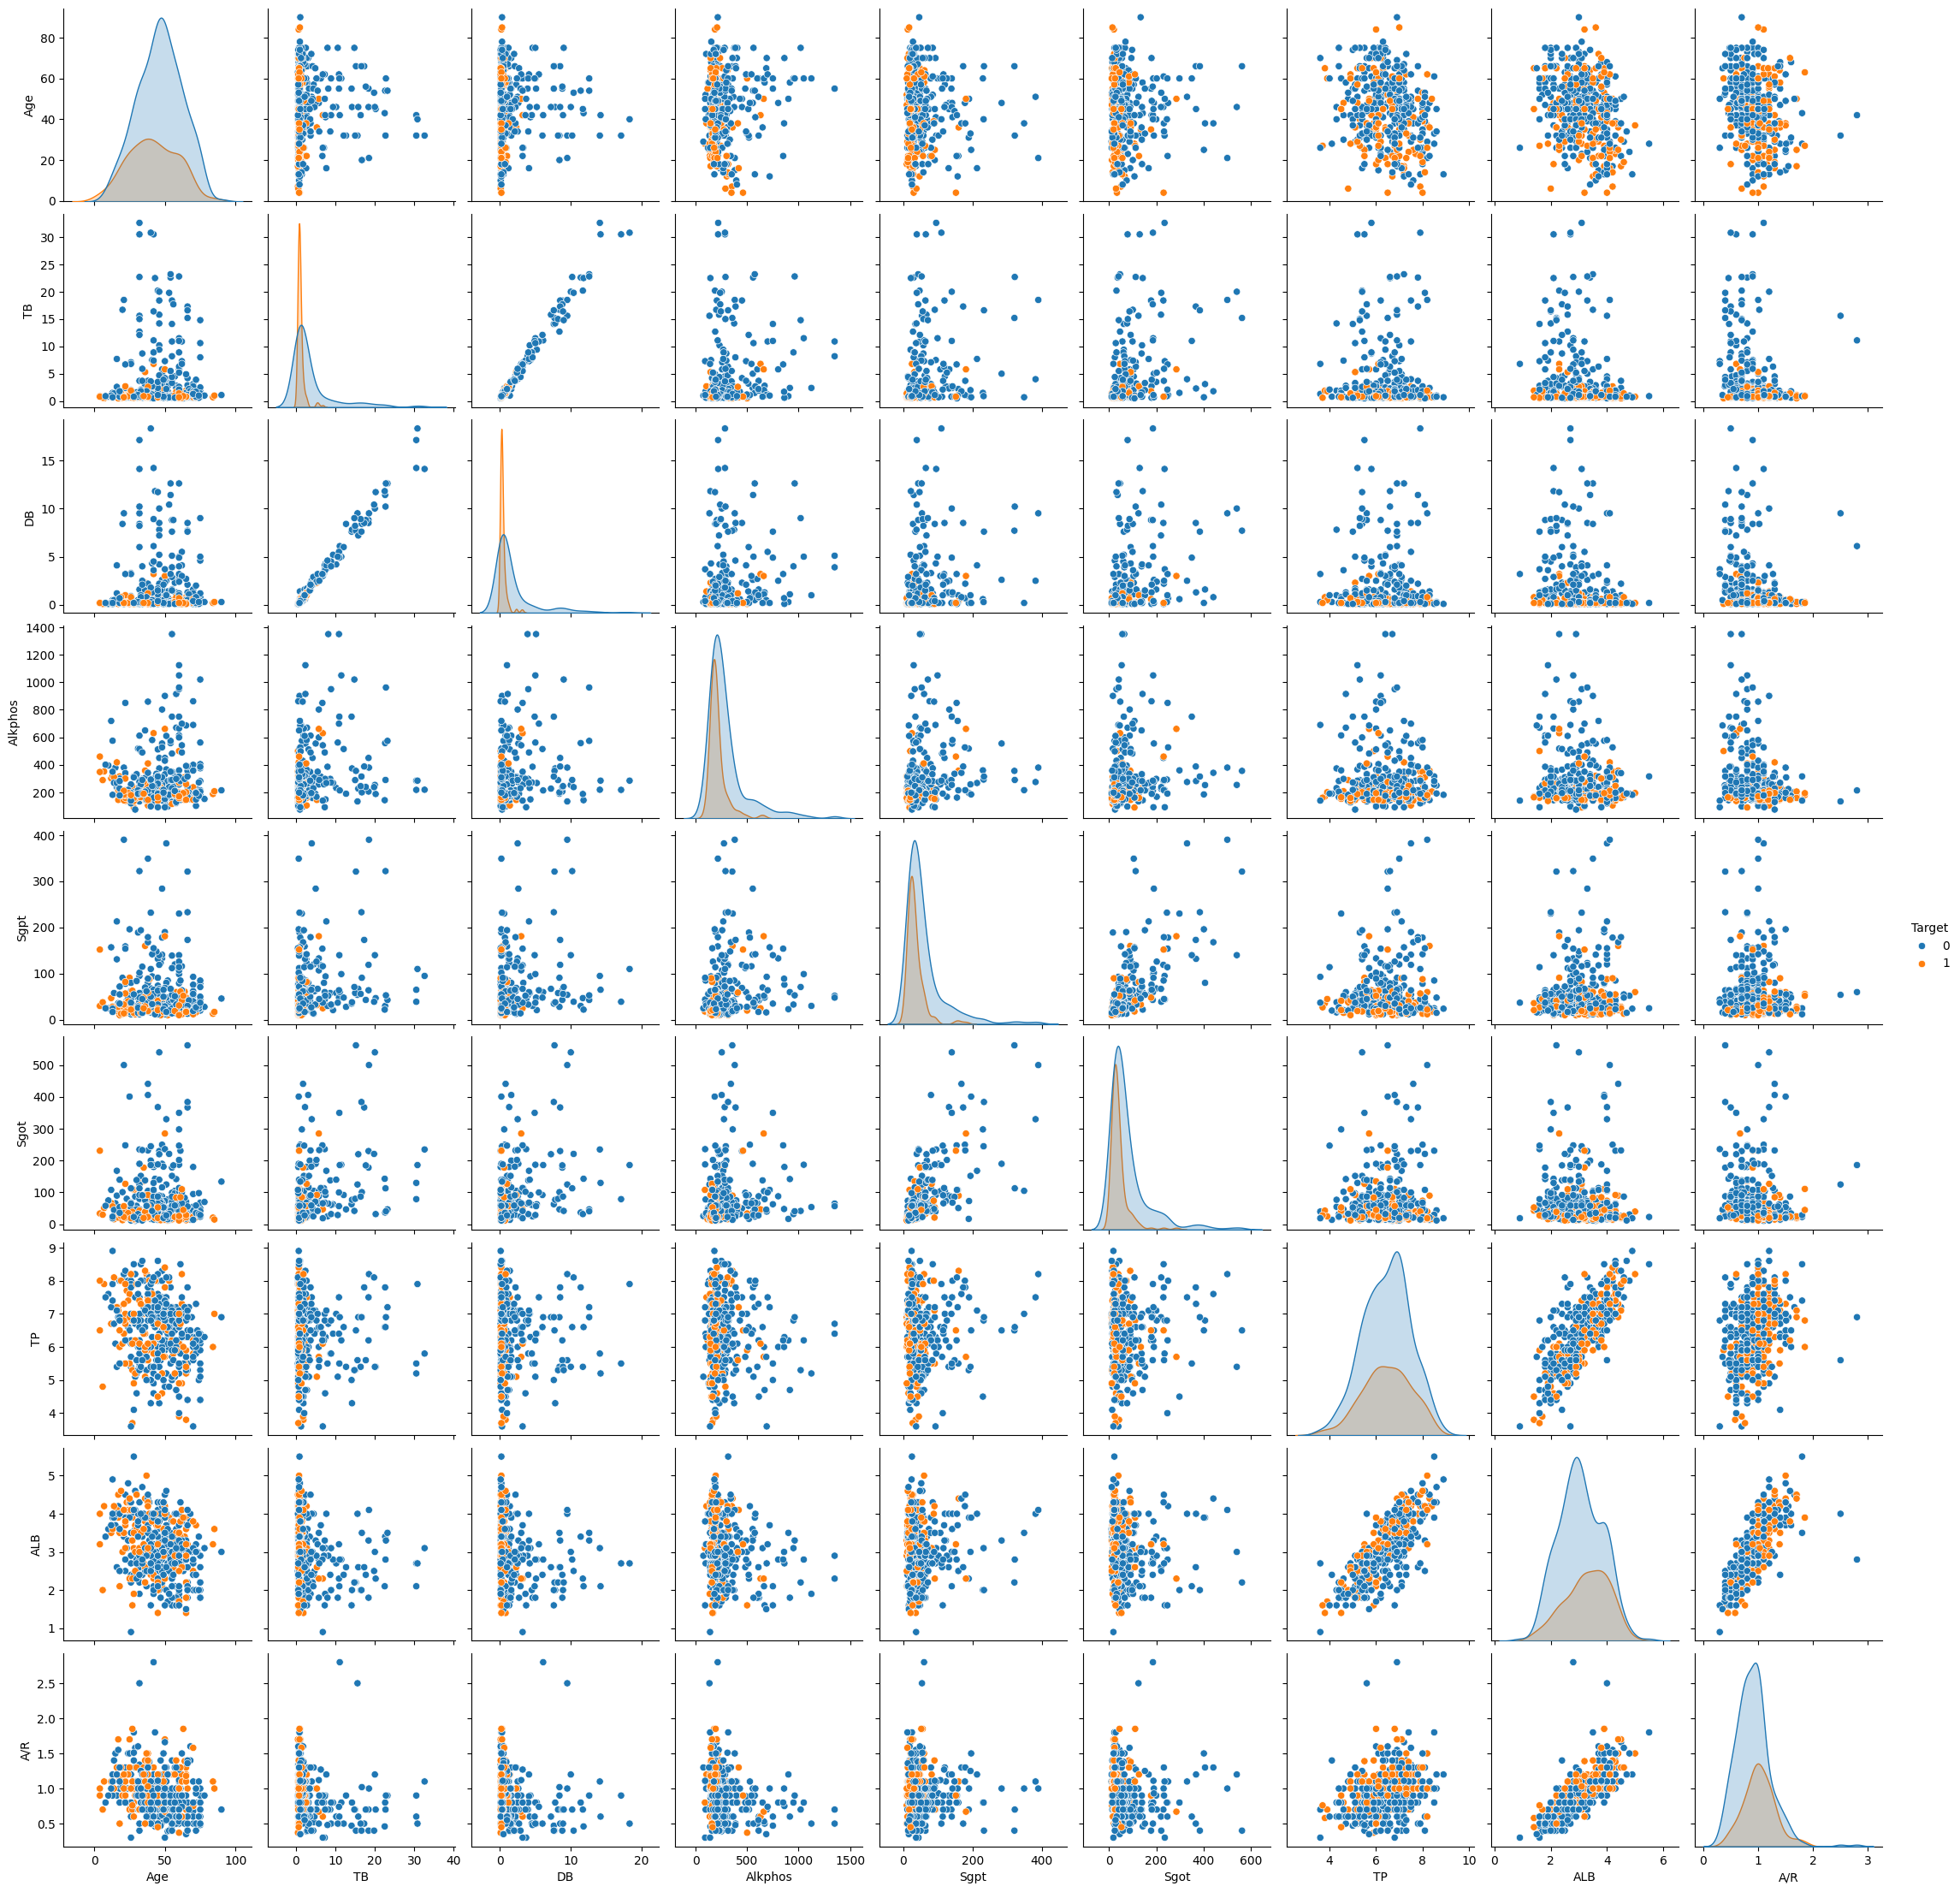

In [115]:
sns.pairplot(data=data[no_outliers], hue="Target")

/tmp/ipykernel_5578/1029354806.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NO_data["DB_residual"] = residual
/tmp/ipykernel_5578/1029354806.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NO_data.drop("DB", axis=1, inplace=True)


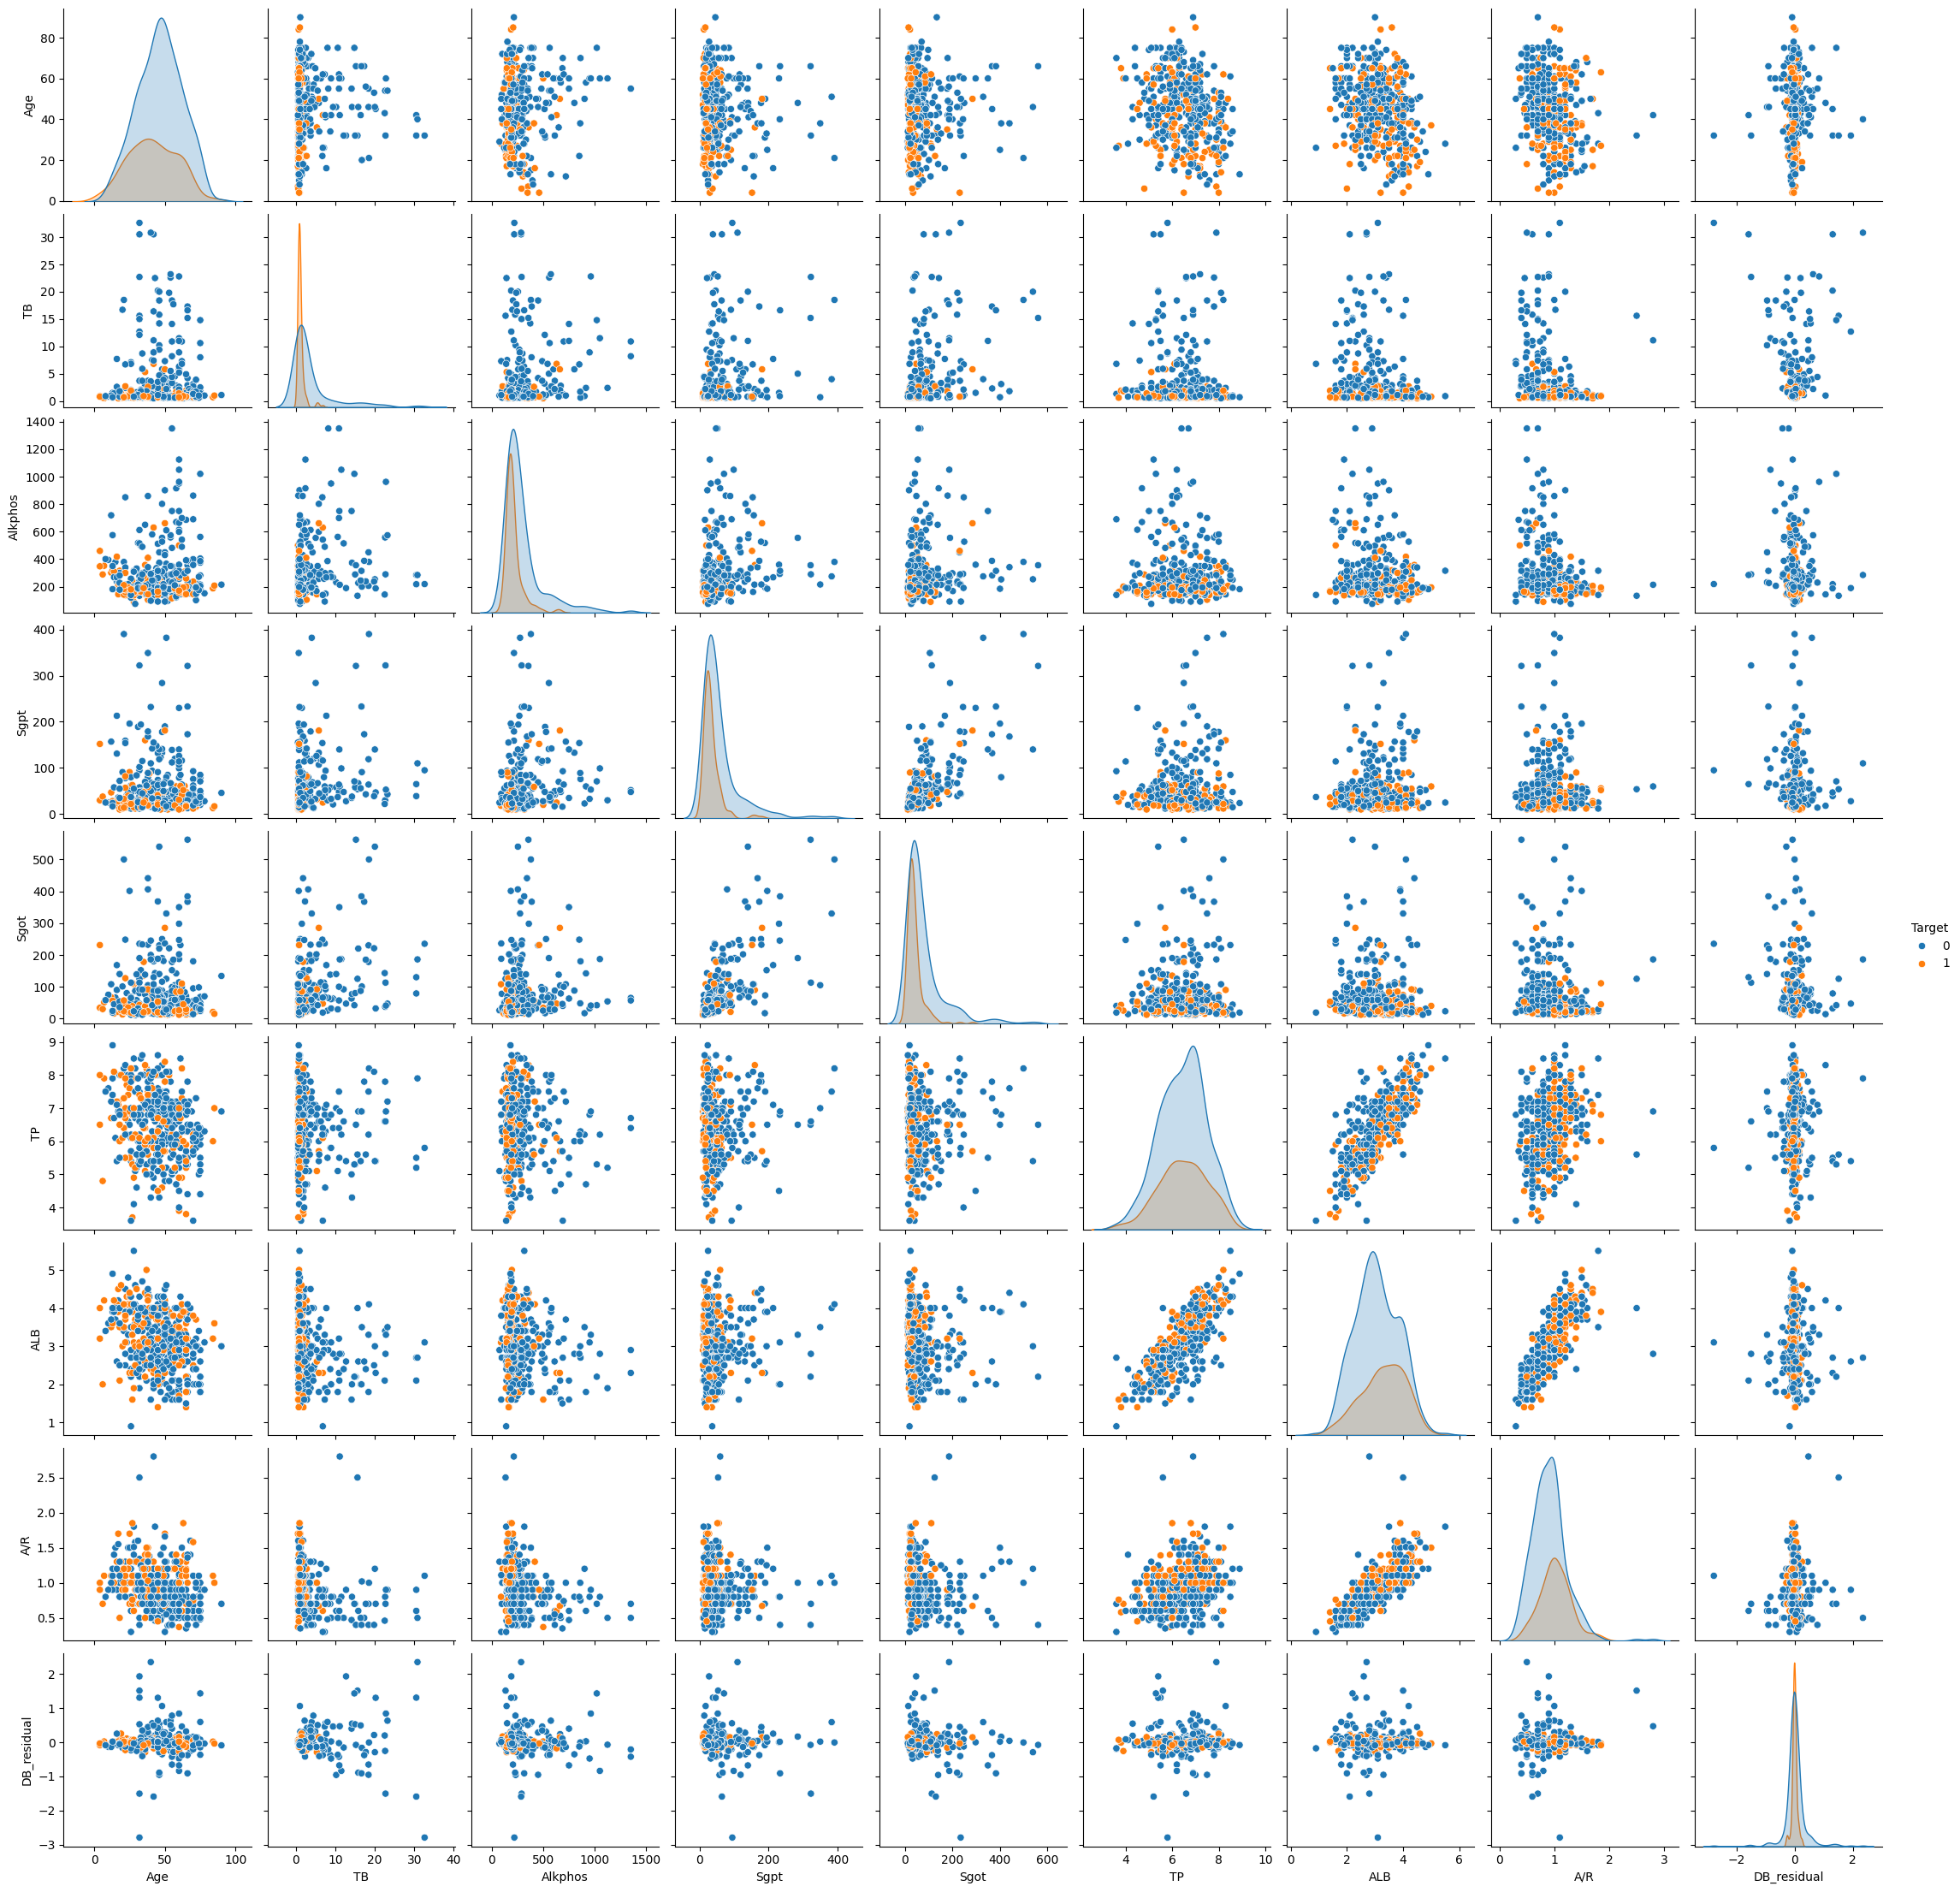

In [135]:
NO_data["TB"].corr(NO_data["DB"])

reg = LinearRegression().fit(NO_data[["TB"]], NO_data["DB"])
residual = NO_data["DB"] - reg.predict(NO_data[["TB"]])
NO_data["DB_residual"] = residual

numerical_columns = ["Age", "TB", "DB_residual", "Alkphos", "Sgpt", "Sgot", "TP", "ALB", "A/R"]
NO_data.drop("DB", axis=1, inplace=True)

sns.pairplot(data=NO_data, hue="Target")